# Proyek Analisis Data: Bike-Sharing Dataset
- **Nama:** Thio Triansyah Putra
- **Email:** thiotriansyah@gmail.com
- **ID Dicoding:** trians

## Menentukan Pertanyaan Bisnis

- Pada kondisi cuaca seperti apa biasanya orang-orang lebih banyak meminjam sepeda?
- Bagaimana perbandingan jumlah peminjaman sepeda saat hari kerja dan hari libur?
- Bagaimana perubahan musim memengaruhi jumlah peminjaman sepeda? musim manakah yang memiliki peminjaman terbanyak dan tersedikit?
- Berapa jumlah peminjaman registered dan casual tiap bulannya?

### Data Description:	
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Import Semua Packages/Library yang Digunakan

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

## Data Wrangling

### Gathering Data

In [23]:
#Load rental data
bike_rental_df = pd.read_csv("data/day.csv")
bike_rental_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset yang digunakan sudah baik karena digunakan juga dalam penelitian lain
- Dataset yang digunakan berupa file CSV dan dibaca dari dalam folder data
- Untuk menjawab pertanyaan bisnis yang dibuat, dibutuhkan hanya data dari "day.csv" saja sehingga dataset yang akan digunakan hanya "day.csv"

### Assessing Data

In [8]:
#Melihat kelengkapan data dan kesesuaian format data
bike_rental_df.info()

#Melihat ringkasan parameter statistik apakah ada keanehan atau tidak
bike_rental_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- "dteday" memiliki tipe data bukan datetime sehingga harus diubah menjadi datetime
- Pada parameter "weathersit" nilai max nya 3, menunjukkan bahwa tidak ada peminjaman saat kondisi cuaca 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
- Data cuaca seperti temp,atemp,hum,windspeed dalam bentuk normalized sehingga lebih baik diubah ke bentuk aslinya untuk mempermudah analisis

### Cleaning Data

In [ ]:
#Mengubah datatype "dteday" menjadi datetime
bike_rental_df["dteday"] = pd.to_datetime(bike_rental_df["dteday"])

#verifiy datetime conversion
#bike_rental_df.info()

#change temp, atemp, hum, windspeed normalized value to original value
#Asumsi normalisasi yang dilakukan hanya dengan membagi value awal dengan nilai maksimum masing-masing parameter
weather_param = ["temp","atemp","hum","windspeed"]
constant = {
    "temp": 41,
    "atemp": 50,
    "hum": 100,
    "windspeed": 67
}

#Run only once after the data is loaded up (untuk memastikan konversi dilakukan sekali saja)
#for column in weather_param:
#    bike_rental_df[column] = (bike_rental_df[column] * constant[column])

#verifiy weather param conversion
bike_rental_df.describe() #max temp dh

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


**Insight:**
- perubahan tipe data "dteday" menjadi datetime untuk mempermudah sorting dan memungkinkan untuk resampling ataupun aggregation berdasarkan waktu
- merubah value pada temp,atemp,hum,windspeed menjadi value sebenarnya dengan mengalikannya dengan maximum value untuk mempermudah analisis jika diperlukan

## Exploratory Data Analysis (EDA)

### Explore ...

##### **#Menjawab Pertanyaan 1**

In [213]:
#Membuat pivot table untuk melihat jumlah rental per-cuacanya
weather_bike_df = bike_rental_df.groupby(by="weathersit").agg({
    "casual": "sum",        #ambil total peminjaman casual
    "registered": "sum",    #ambil total peminjaman registered
    "cnt": "sum"            #total peminjaman casual + registered
    }
)
weather_bike_df.rename_axis("weather_conditions",inplace=True)
weather_bike_df.rename(columns={"cnt": "total_rental"}, inplace=True)

#cek jumlah rental per kondisi cuaca
# 1 = Clear, Few clouds, Partly cloudy, Partly cloudy
# 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
weather_bike_df

,casual,registered,total_rental
weather_conditions,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


#### **#Menjawab Pertanyaan 2**

In [259]:
#Mencari jumlah 
workday_bike_df = bike_rental_df.groupby("workingday").agg({
    "casual": "sum",        #ambil total peminjaman casual
    "registered": "sum",    #ambil total peminjaman registered
    "cnt": "sum"            #total peminjaman casual + registered
    }
)
workday_bike_df.rename_axis("working_day",inplace=True)
workday_bike_df.rename(columns={"cnt": "total_rental"}, inplace=True)

#value 0 = libur
#value 1 = working day
workday_bike_df


,casual,registered,total_rental
working_day,,,
0,316732,683537,1000269
1,303285,1989125,2292410


#### **#Menjawab Pertanyaan 3**

In [73]:
#melihat jumlah peminjaman per-musimnya
season_sum_df = bike_rental_df.groupby("season").agg({
    "casual": "sum",        #ambil total peminjaman casual
    "registered": "sum",    #ambil total peminjaman registered
    "cnt": "sum"            #total peminjaman casual + registered
    }
).sort_values(by="cnt",ascending=False)
season_sum_df.rename(columns={"cnt": "total_rental"}, inplace=True)


#musim manakah yang memiliki jumlah peminjaman terbanyak dan tersedikit? (1:spring, 2:summer, 3:fall, 4:winter)
# Max: 3 - Fall
# Min: 1 - Spring
season_sum_df


,casual,registered,total_rental
season,,,
3,226091,835038,1061129
2,203522,715067,918589
4,129782,711831,841613
1,60622,410726,471348


#### **#Menjawab Pertanyaan 4**

In [297]:
#Melihat jumlah peminjaman per bulan
monthly_rental_df = bike_rental_df.resample(rule='ME', on='dteday').agg({
    "casual": "sum",        #ambil total peminjaman casual
    "registered": "sum",    #ambil total peminjaman registered
    "cnt": "sum"            #total peminjaman casual + registered
    }
)

#Merubah bentuk data dari YYYY-MM-DD menjadi YYYY-MM untuk mempermudah melihat data
monthly_rental_df.index = monthly_rental_df.index.strftime("%Y-%m")
monthly_rental_df = monthly_rental_df.reset_index()

#merubah nama kolom menyesuaikan konteks
monthly_rental_df.rename(columns={"dteday": "month", "cnt": "total_rental"}, inplace=True)
monthly_rental_df


,month,casual,registered,total_rental
0,2011-01,3073,35116,38189
1,2011-02,6242,41973,48215
2,2011-03,12826,51219,64045
3,2011-04,22346,72524,94870
4,2011-05,31050,104771,135821
5,2011-06,30612,112900,143512
6,2011-07,36452,104889,141341
7,2011-08,28842,107849,136691
8,2011-09,26545,100873,127418
9,2011-10,25222,98289,123511


**Insight:**
- Didapati untuk menjawab pertanyaan yang sudah dibuat, dapat dilakukan dengan memebuat sebuah pivot table untuk melihat data yang di-grouped sesuai dengan kebutuhan masing-masing pertanyaan
- Untuk memudahkan melihat tabel atau data yang ada, ada beberapa parameter atau data yang perlu diubah format/namanya untuk memperjelas konteks dari data tersebut

## Visualization & Explanatory Analysis

### Pertanyaan 1:

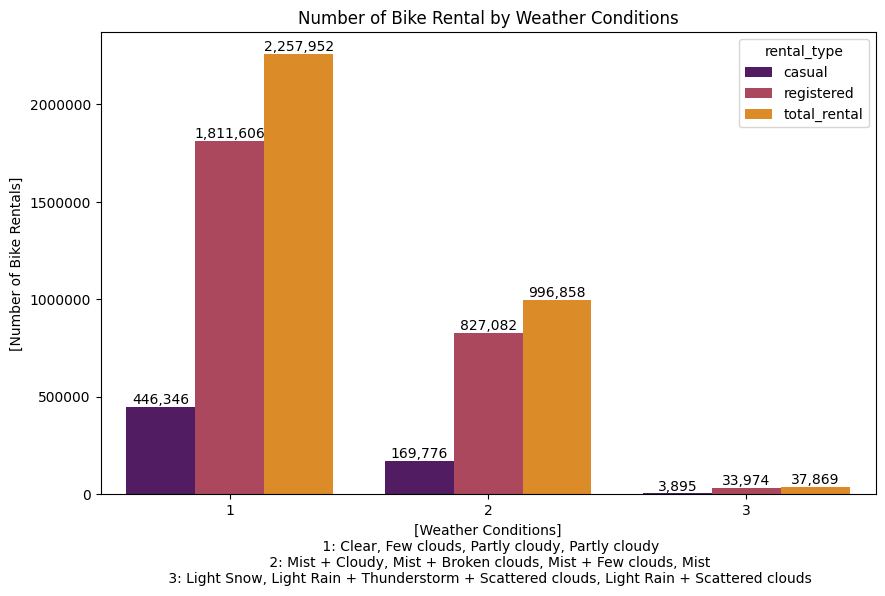

In [308]:
#Visualisasi dari jumlah rental sepeda per kondisi cuaca
#+ weathersit : 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#Reset dataframe index
weather_bike = weather_bike_df.reset_index()
#Reshape the DataFrame to a long format using pd.melt()
weather_bike_melted = pd.melt(weather_bike, id_vars="weather_conditions", 
                    value_vars=["casual", "registered", "total_rental"],
                    var_name="rental_type", value_name="count")



# Create the grouped bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='weather_conditions', y='count', hue='rental_type', palette="inferno", data=weather_bike_melted)
plt.xlabel('[Weather Conditions]\n 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds')
plt.ylabel('[Number of Bike Rentals]')
plt.title('Number of Bike Rental by Weather Conditions')

# Merubah tampilan angka pada sumbu Y
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

#Memberikan nilai pada setiap bar nya untuk memperjelas jumlah rental
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val):,}' for val in container.datavalues])

plt.show()

### Pertanyaan 2:

In [309]:
workday_bike_df

,casual,registered,total_rental
working_day,,,
0,316732,683537,1000269
1,303285,1989125,2292410


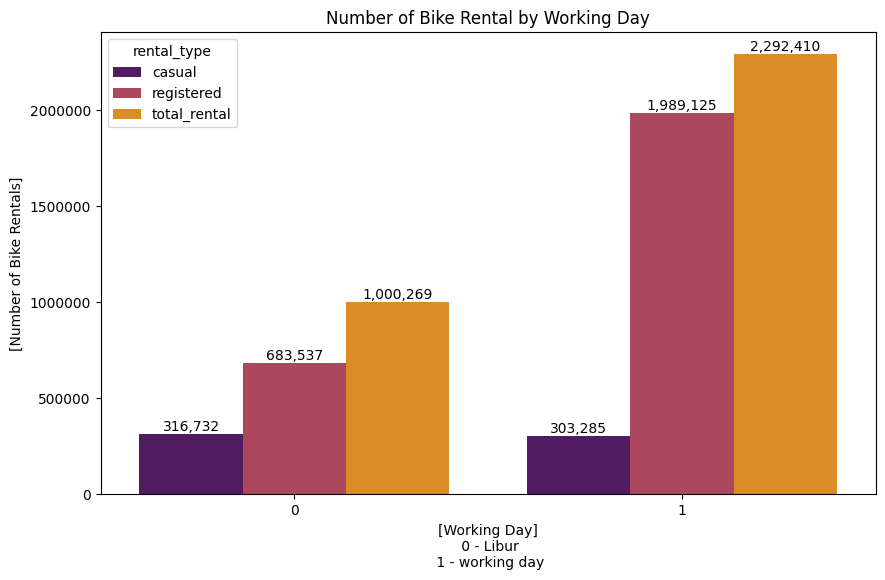

In [310]:
#Workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#1 - working day
#0 - Libur

#reset dataframe index
workday_bike = workday_bike_df.reset_index()
workday_bike_melted = pd.melt(workday_bike, id_vars="working_day", 
                    value_vars=["casual", "registered", "total_rental"],
                    var_name="rental_type", value_name="count")

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='working_day', y='count', hue='rental_type', palette="inferno", data=workday_bike_melted)
plt.xlabel('[Working Day]\n 0 - Libur\n 1 - working day')
plt.ylabel('[Number of Bike Rentals]')
plt.title('Number of Bike Rental by Working Day')

# Merubah tampilan angka pada sumbu Y
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

#Memberikan nilai pada setiap bar nya untuk memperjelas jumlah rental
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val):,}' for val in container.datavalues])

plt.show()

### Pertanyaan 3:

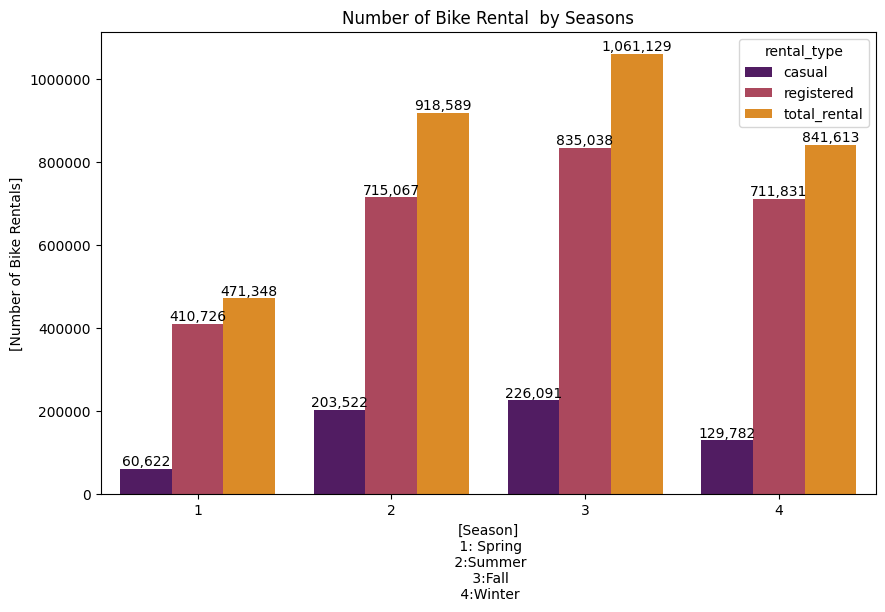

In [ ]:
#(1:springer, 2:summer, 3:fall, 4:winter)

#reset dataframe index
season_sum = season_sum_df.reset_index()
season_sum_melted = pd.melt(season_sum, id_vars="season", 
                    value_vars=["casual", "registered", "total_rental"],
                    var_name="rental_type", value_name="count")

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='season', y='count', hue='rental_type', palette="inferno", data=season_sum_melted)
plt.xlabel('[Season]\n 1: Spring\n 2:Summer\n 3:Fall\n 4:Winter')
plt.ylabel('[Number of Bike Rentals]')
plt.title('Number of Bike Rental by Seasons')

# Merubah tampilan angka pada sumbu Y
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

#Memberikan nilai pada setiap bar nya untuk memperjelas jumlah rental
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val):,}' for val in container.datavalues])

plt.show()

### Pertanyaan 4:

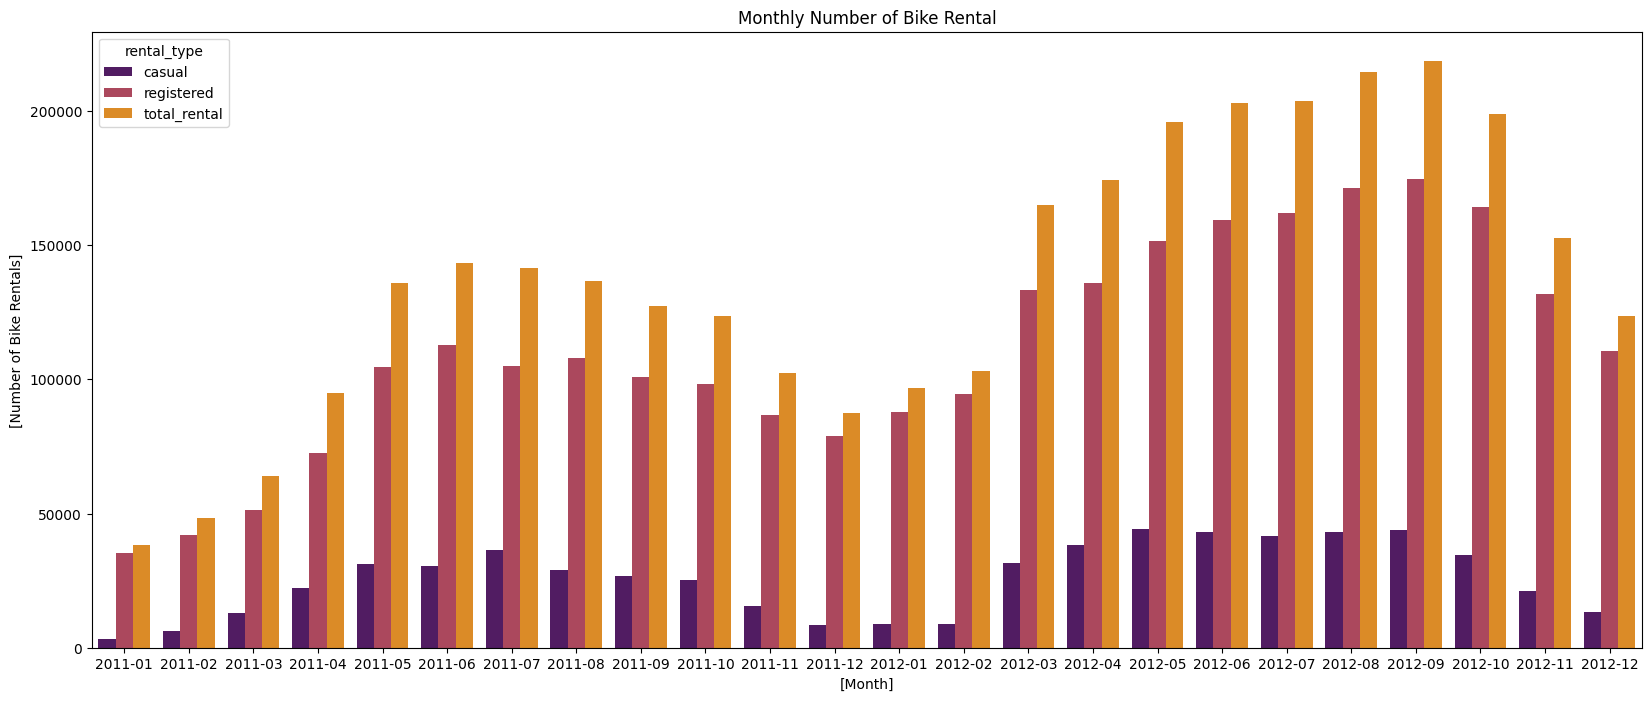

In [313]:
#reset dataframe index
monthly_rental = pd.melt(monthly_rental_df, id_vars="month", 
                    value_vars=["casual", "registered", "total_rental"],
                    var_name="rental_type", value_name="count")

# Create the grouped bar chart
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='month', y='count', hue='rental_type', palette="inferno", data=monthly_rental)
plt.xlabel('[Month]')
plt.ylabel('[Number of Bike Rentals]')
plt.title('Monthly Number of Bike Rental')

# Merubah tampilan angka pada sumbu Y
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

#Memberikan nilai pada setiap bar nya untuk memperjelas jumlah rental
#for container in ax.containers:
#   ax.bar_label(container, labels=[f'{int(val):,}' for val in container.datavalues])

plt.show()

**Insight:**
- Dari grafik yang dibuat untuk menjawab pertanyaan 1, dapat dilihat bahwa total peminjaman terbanyak
ada pada kondisi cuaca 1 yaitu kondisi cuaca clear,few clouds,partly cloudy. Dan dari setiap
kondisi cuaca total peminjaman registered cenderung lebih banyak dibandingkan dengan peminjaman casual.
Pada kondisi cuaca 3 total peminjaman sangatlah sedikit dibandingkan dengan kondisi cuaca 1 karena pada
cuaca 3 kemungkinan orang untuk meminjam sepeda pada cuaca yang tidak kondusif sangat kecil

- Dari grafik yang dibuat untuk menjawab pertanyaan 2, secara total dapat dilihat bahwa peminjaman
lebih banyak saat hari kerja dan untuk tipe peminjaman registered lebih banyak dibandingkan casual

- Dari grafik yang dibuat untuk menjawab pertanyaan 3, musim yang memiliki total peminjaman terbanyak
yaitu musim fall dan musim dengan total peminjaman paling sedikit adalah musim spring

- Dari grafik yang dibuat untuk menjawab pertanyaan 4, dilihat dari total peminjaman, peminjaman terbanyak ada pada "2012-09"
dan peminjaman paling sedikit ada pada "2011-01". Dilihat dari bentuk grafiknya bahwa setiap tahunnya peminjaman
mengalami kenaikan dan penurunan peminjaman dimana kenaikan terbesar terjadi di tahun 2012 jika dibandingkan dengan
peminjaman tahun 2011

## Conclusion

- Peminjaman sepeda lebih sering terjadi pada kondisi cuaca clear,few clouds,partly cloudy dimana kondisi cuaca ini
mendukung untuk kegiatan bersepeda
- Jumlah peminjaman sepeda terbanyak ada pada hari kerja
- Musim yang paling banyak terjadi peminjaman ada pada musim Fall dan perubahan musim mempengaruhi juga jumlah peminjaman sepeda
- Pada tahun 2011, peminjaman lebih dari 100.0000 terjadi pada bulan Mei-November dan pada Januari-Maret serta Desember peminjaman kurang dari 100.000
Pada tahun 2012, peminjaman lebih dari 100.000 terjadi pada februari-desember dan pada januari kurang dari 100.000. Pada bulan Juni-September bahkan peminjaman
melebihi 200.000